In [1]:
### Machine Learning Online Class - Exercise 2: Logistic Regression
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### Load Data
### The first two columns contains the exam scores and the third column
### contains the label.

df=pd.read_csv('ex2data1.txt',sep=',',header=None)
X=df.loc[:,0:1].values
y=df.loc[:,2].values

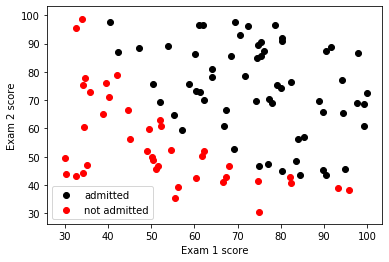

In [2]:
# PART 1: plot the data 
### find indices of positive and negative examples 
pos=np.where(y==1)
neg=np.where(y==0)

plt.scatter(X[pos, 0], X[pos, 1], c='black', label='admitted')
plt.scatter(X[neg, 0], X[neg, 1], c='red',label='not admitted')
plt.xlabel('Exam 1 score')
plt.ylabel('Exam 2 score')
plt.legend()
plt.show()

In [3]:
### PART 2: COMPUTE COST AND GRADIENT 
[m,n]=np.shape(X)
X=np.hstack((np.ones((m,1)),X))
y=np.transpose([df.loc[:,2].values])

initial_theta = np.zeros((n+1,1))

def sigmoid(z):
    g=1/(1+np.exp(-z))
    return g

def costFunction(theta, X, y):
    J=0
    grad=np.zeros(np.shape(theta))
    tmp1=np.zeros((m,1))
    tmp2=np.zeros((m,n+1))
    for i in range(m):
        h_x=sigmoid(np.transpose(theta).dot(np.transpose(X[i,:])))
        tmp1[i]=-y[i]*np.log(h_x)-(1-y[i])*np.log(1-h_x)
        tmp2[i,:]=(h_x-y[i])*X[i,:]
    J=(1/m)*np.sum(tmp1)
    grad=(1/m)*np.sum(tmp2,axis=0) 
    return J, grad

[cost, grad]=costFunction(initial_theta, X, y)

print('Cost at initial theta (zeros):\n', cost)
print('Expected cost (approx): 0.693\n');
print('Gradient at initial theta (zeros): \n');
print('\n', grad);
print('Expected gradients (approx):\n -0.1000\n -12.0092\n -11.2628\n')

Cost at initial theta (zeros):
 0.6931471805599453
Expected cost (approx): 0.693

Gradient at initial theta (zeros): 


 [ -0.1        -12.00921659 -11.26284221]
Expected gradients (approx):
 -0.1000
 -12.0092
 -11.2628



In [4]:
test_theta = np.array([[-24], [0.2], [0.2],])
[cost, grad] = costFunction(test_theta, X, y)

print('\nCost at test theta: \n', cost)
print('Expected cost (approx): 0.218\n')
print('Gradient at test theta: \n')
print('\n', grad)
print('Expected gradients (approx):\n 0.043\n 2.566\n 2.647\n')


Cost at test theta: 
 0.21833019382659782
Expected cost (approx): 0.218

Gradient at test theta: 


 [0.04290299 2.56623412 2.64679737]
Expected gradients (approx):
 0.043
 2.566
 2.647



In [5]:
### PART 3: OPTIMIZING USING fminunc
import scipy.optimize as op

def computeCost(theta, X, y):
    J=0
    tmp1=np.zeros((m,1))
    for i in range(m):
        h_x=sigmoid(np.transpose(theta).dot(np.transpose(X[i,:])))
        tmp1[i]=-y[i]*np.log(h_x)-(1-y[i])*np.log(1-h_x)
    J=(1/m)*np.sum(tmp1)
    return J

###use a non-zero theta
theta=op.fmin_bfgs(computeCost, x0=test_theta, args=(X,y), maxiter=400)

### Print theta to screen
print('\n Cost at theta found by fminunc: \n', computeCost(theta,X,y));
print('Expected cost (approx): 0.203\n');
print('theta: \n');
print('\n', theta);
print('Expected theta (approx):\n');
print(' -25.161\n 0.206\n 0.201\n');

Optimization terminated successfully.
         Current function value: 0.203498
         Iterations: 16
         Function evaluations: 110
         Gradient evaluations: 22

 Cost at theta found by fminunc: 
 0.20349770159116326
Expected cost (approx): 0.203

theta: 


 [-25.16122643   0.20623085   0.20147073]
Expected theta (approx):

 -25.161
 0.206
 0.201



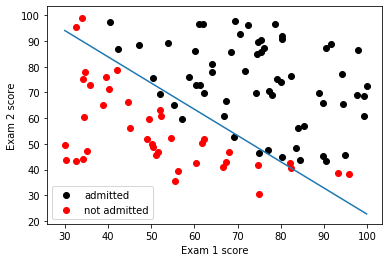

In [6]:
### plot boundary
X_plot=df.loc[:,0:1].values
y_plot=df.loc[:,2].values
pos=np.where(y_plot==1)
neg=np.where(y_plot==0)
plt.scatter(X_plot[pos, 0], X_plot[pos, 1], c='black', label='admitted')
plt.scatter(X_plot[neg, 0], X_plot[neg, 1], c='red',label='not admitted')
plt.xlabel('Exam 1 score')
plt.ylabel('Exam 2 score')

plot_x=np.array([np.min(X[:,1]), np.max(X[:,1])])
plot_line = (-1/theta[2])*(theta[1]*plot_x + theta[0])
plt.plot(plot_x,plot_line)

plt.legend()
plt.show()

In [7]:
### PART 4: Predict and Accuracies 
### In this part, you will use the logistic regression model
### to predict the probability that a student with score 45 on exam 1 and 
### score 85 on exam 2 will be admitted.

prob = sigmoid(np.array([1, 45, 85]).dot(theta))
print('For a student with scores 45 and 85, we predict an admission probability of \n', prob)
print('\nExpected value: 0.775 +/- 0.002\n')

For a student with scores 45 and 85, we predict an admission probability of 
 0.7762896923341756

Expected value: 0.775 +/- 0.002



In [8]:
### Compute accuracy on our training set
p = np.where(np.array([sigmoid(np.transpose(theta).dot(np.transpose(X)))]) >= .5, 0, 1)

print('Train Accuracy: \n', np.mean(np.where(np.transpose(p)==y,0,1)) * 100, '\n')
print('Expected accuracy (approx): 89.0\n')

Train Accuracy: 
 89.0 

Expected accuracy (approx): 89.0

